

# Project:  The Movie Database (IMDb) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> This data set has around 10,000 movies collected from The Movie Database (TMDb) which includes user ratings and revenue.
In this data analysis, we will be investigating about
- 1. what is the most popular genre of movies from year to year.
- 2. what properties are most associated with the highest revenue in the movies. We will look at any associations between the dependant variable, revenue and 3 other independant variable,budget, popularity and average votes (this is average_average). All of the following will be using statistical tools.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [50]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- After reading the data, and loading in the statistical tools,
- I look at the dataset, there are 10866 movies with 21 column titles and the descriptions are as follows:
   - id                      (The id for this movie which are unique)
   - imdb_id                 (This is imdb's unique id)               
   - popularity              (How popular was this movie)              
   - budget                  (How much budget was put in this movie)          
   - revenue                 (How much revenue this movie made)         
   - original_title          (The name of this movie title)
   - cast                    (Who played in it)
   - homepage                (Webpage name)
   - director                (Who directed this movie)
   - tagline                 (tagline used for this movie)
   - keywords                (keywords used for this movie)
   - overview                (An overview of this movie)
   - runtime                 (how long was this movie)
   - genres                  (genres of this movie)
   - production_companies    (What was the name of the production company)
   - release_date            (Date this movie was released)
   - vote_count              (vote count)
   - vote_average            (Average vote)
   - release_year            (Year it was released)
   - budget_adj              (adjusted budget)
   - revenue_adj             (adjusted revenue)
    

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- We will be looking at the budget and revenue AFTER adjustments because this reflects a truer figure than the original revenue and budget numbers. According to Google internet Q&A, both Budget and Revenue Adjustments allows users to make budgetary and revenue reconciliations therefore reflecting a closer monetary picture.

- On the average, a budgeted movie costed 1.755104e+07 (over 17 mil) and revenue was 5.136436e+07 (51 mil) with an average popularity of 0.646% and the vote_average 5.9 out of a maximum of 9.2
- In general, the adjusted budget lies between no budgets to 4.250000e+08 and the revenue lies between 0 and 2.827124e+09

- I ran a check of isnull to check if there are key missing data and what we are interested is the genre.
Since there are only 23 missing genres, I am not going to try to fill them in because the margin of error is too small, which is 0.2%  to affect any calculations with the associated revenue_adj and budget

In [22]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [2]:
23/10866


0.0021166942757224368

In [52]:
df_clean=df

I just made a replica of the original database so that I can focus on the focused workable databse df_clean at this point

In [53]:

df_clean

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15



### Data Cleaning - main focus is to separate the Genres into it's individual sector columns

In [ ]:

- Here is the list that needs to be corrected and focused upon.
- drop all the columns that are irrelevant to this analysis and focus on answering to the question posed
- Extract the relevant genres and group them by their relevant groups for statistical analysis


 - Below, I am dropping off all irrelevant columns and only focus on the columns that are relevant.

In [54]:
df_clean.drop(['id','imdb_id','budget','revenue','vote_count'], axis=1, inplace = True)

In [55]:
df_clean.drop(['cast','homepage','director','tagline','keywords','overview','production_companies','release_date'], axis=1, inplace = True)

In [56]:
df_clean.head()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


 - This is a sidenote : It is interesting to note that the most popular movie was Jurassic World released in 2015 with an average vote of 6.5 and a maximum popularity of 32.98 making a profit of over 1.2 bil (revenue - budget)

In [57]:
title = df_clean[df_clean.popularity > 30]

In [58]:
title

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
1.392446e+09 - 1.37999e+08

1254447000.0

In [59]:
df1=df_clean

In [60]:
df1.head()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


 - the following process is trying to isolate and breakdown the groupings in genres to each individual form of genres

In [61]:
df1[['genres','g2','g3','g4','g5']] = df['genres'].str.split('|',expand=True)

In [43]:
df1.sample(10)

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,g2,g3,g4,g5
9730,0.621202,Hang 'em High,114,Western,6.3,1968,1.128413e+07,4.262895e+07,None,None,None,None
4125,0.206832,Evelyn,92,Drama,6.9,2002,0.000000e+00,0.000000e+00,Foreign,None,None,None
10127,0.217788,The Curse of the Werewolf,93,Horror,7.0,1961,0.000000e+00,0.000000e+00,None,None,None,None
7051,0.802577,White Chicks,109,Comedy,6.4,2004,4.271448e+07,1.305522e+08,None,None,None,None
1876,0.096111,Art & Copy,89,Documentary,6.9,2009,0.000000e+00,0.000000e+00,None,None,None,None
10288,0.538484,Another Stakeout,105,Action,4.9,1993,0.000000e+00,0.000000e+00,Comedy,None,None,None
3558,0.588821,J. Edgar,137,Drama,5.8,2011,3.392893e+07,8.201692e+07,Crime,History,None,None
10663,0.318475,Santa Claus Is Comin' to Town,48,TV Movie,6.5,1970,0.000000e+00,0.000000e+00,Animation,Family,Fantasy,None
4183,2.126863,The Naked Gun 33â…“: The Final Insult,83,Comedy,6.1,1994,4.413335e+07,7.522176e+07,Action,Crime,None,None
787,0.894732,How to Make Love Like an Englishman,99,Comedy,5.5,2014,0.000000e+00,0.000000e+00,None,None,None,None


In [62]:
melt_df1=pd.melt(df1,
                 id_vars=['original_title'],
                value_vars=['genres','g2','g3','g4','g5'],
                 var_name='genre_spread',
                 value_name='Genres')


In [63]:
melt_df1.sample(10)

,original_title,genre_spread,Genres
35904,Until the Light Takes Us,g4,None
15952,The Reckoning,g2,Drama
37735,De Zaak Alzheimer,g4,Action
9080,Merlin,genres,Adventure
43525,Fantastic Four,g5,None
12399,Up in the Air,g2,Romance
20262,New Jack City,g2,Crime
949,A Royal Christmas,genres,TV Movie
50559,Barbershop 2: Back in Business,g5,None
14946,Abandon,g2,Mystery


In [65]:
melt_df1.Genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', nan, 'Foreign', None], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 What is the most popular genre of movies from year to year.

- As you can see from the visual bar chart and data structure, the most popular genre is Drama

In [67]:
melt_df1.groupby('Genres')['Genres'].value_counts()

Genres           Genres         
Action           Action             2385
Adventure        Adventure          1471
Animation        Animation           699
Comedy           Comedy             3793
Crime            Crime              1355
Documentary      Documentary         520
Drama            Drama              4761
Family           Family             1231
Fantasy          Fantasy             916
Foreign          Foreign             188
History          History             334
Horror           Horror             1637
Music            Music               408
Mystery          Mystery             810
Romance          Romance            1712
Science Fiction  Science Fiction    1230
TV Movie         TV Movie            167
Thriller         Thriller           2908
War              War                 270
Western          Western             165
Name: Genres, dtype: int64

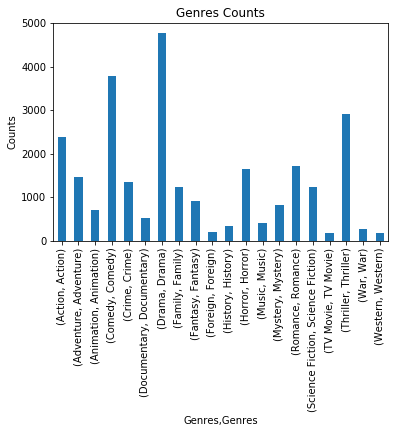

In [73]:
plt.title('Genres Counts')
plt.xlabel('Genres')
plt.ylabel('Counts')
melt_df1.groupby(['Genres']).Genres.value_counts().plot(kind='bar');

### Research Question 2   What properties are most associated with the highest revenue in the movies.

- We want to know if there is any correlationship between revenue and budget,
- between revenue and popularity
- and between revenue and vote_average


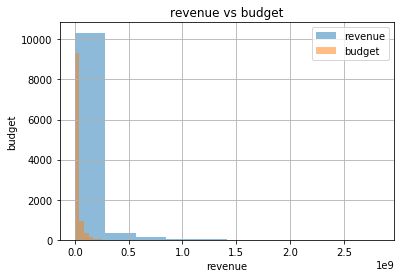

In [90]:
df.revenue_adj.hist(alpha=0.5,label='revenue')
df.budget_adj.hist(alpha=0.5,label='budget');
plt.xlabel('revenue')
plt.ylabel('budget')
plt.title('revenue vs budget')
plt.legend();

In [87]:
df.revenue_adj.mean()

51364363.253250986

In [88]:
df.budget_adj.mean()

17551039.82288678

- We cannot tell for sure that there is a correlation between revenue and budget because in the histogram chart above, there are movies that have big budgets, the revenue also are big.  But there are also small budget movies that show high revenues. On the average, revenues are made more than their budgets as shown in their means. Both are skewed to the right.

Text(0.5,1,'revenue vs popularity')

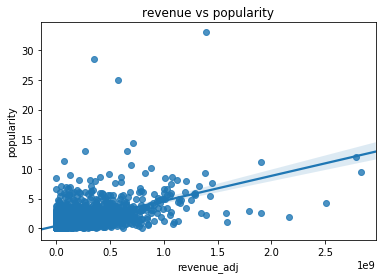

In [95]:
sns.regplot(data = df, x = 'revenue_adj', y = 'popularity')
plt.title('revenue vs popularity')

- As shown in the seaborns regplot function, it combines scatterplot with regression function fitting. The trend line shows that there is a correlation between popularity and revenue. The more the popularity, the higher the revenue.

Text(0.5,1,'revenue vs average vote')

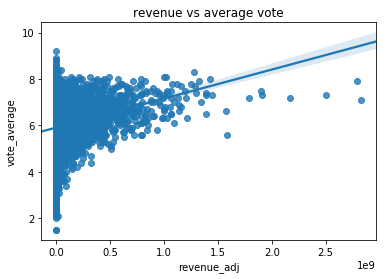

In [96]:
sns.regplot(data = df, x = 'revenue_adj', y = 'vote_average')
plt.title('revenue vs average vote')

- As shown above, there is a strong correlation between revenue and average vote. It shows a positive correlation which means as average vote increases, the revenue increases.  This makes sense because the more people like the movie, the more people will attend the movies and therefore, the movies will make more revenue.

<a id='conclusions'></a>
## Conclusions

To summarize my findings for this project; the most popular genre was from Drama movies. There is a strong positive correlation between popularity, average vote and revenue but cannot establish a correlation between budget and revenue.

My limitations to my findings is based on the data from TMDb. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])